In [1]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
N = 1000
x = np.random.random((N, 2)) * 6 - 3
y = np.cos(2 * x[:, 0]) + np.cos(3 * x[:, 1])

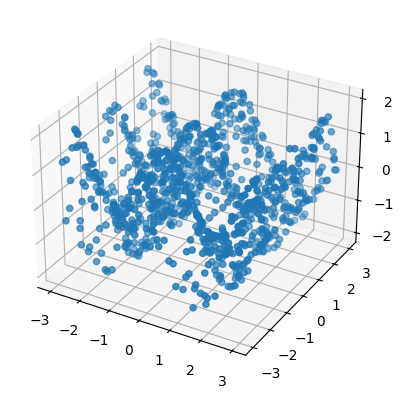

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x[:, 0], x[:, 1], y)
plt.show()

In [4]:
model = nn.Sequential(
    nn.Linear(2, 128),
    nn.ReLU(), 
    nn.Linear(128, 1)
)

In [5]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [6]:
def full_gd(model, criterion, optimizer, x_train, y_train, epochs=1000):
    train_losses = []
    
    for i in range(epochs):
        optimizer.zero_grad()
        
        outputs = model(x_train)
        loss = criterion(outputs, y_train)
        
        loss.backward()
        optimizer.step()
        
        train_losses.append(loss.item())
        
        if(i + 1) % 50 == 0:
            print(f"Epoch {i + 1}/{epochs}, train_loss: {loss.item():.4f}")
            
    return train_losses

In [7]:
x_train = torch.from_numpy(x.astype(np.float32))
y_train = torch.from_numpy(y.astype(np.float32).reshape(-1, 1))

In [8]:
train_losses = full_gd(model, criterion, optimizer, x_train, y_train)

Epoch 50/1000, train_loss: 0.7102
Epoch 100/1000, train_loss: 0.3797
Epoch 150/1000, train_loss: 0.2184
Epoch 200/1000, train_loss: 0.0991


Epoch 250/1000, train_loss: 0.0382
Epoch 300/1000, train_loss: 0.0139
Epoch 350/1000, train_loss: 0.0072
Epoch 400/1000, train_loss: 0.0053
Epoch 450/1000, train_loss: 0.0046
Epoch 500/1000, train_loss: 0.0045
Epoch 550/1000, train_loss: 0.0039
Epoch 600/1000, train_loss: 0.0038
Epoch 650/1000, train_loss: 0.0041
Epoch 700/1000, train_loss: 0.0035
Epoch 750/1000, train_loss: 0.0034
Epoch 800/1000, train_loss: 0.0038
Epoch 850/1000, train_loss: 0.0032
Epoch 900/1000, train_loss: 0.0031
Epoch 950/1000, train_loss: 0.0035
Epoch 1000/1000, train_loss: 0.0030


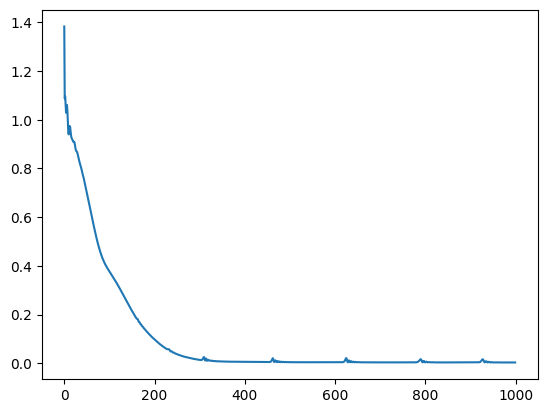

In [9]:
plt.plot(train_losses)
plt.show()

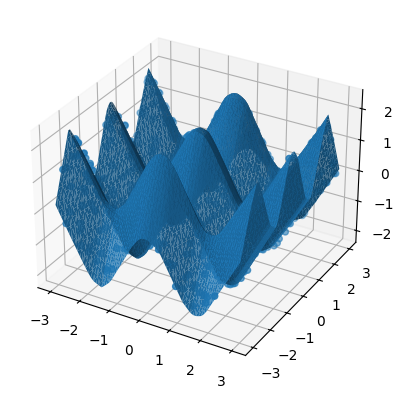

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x[:, 0], x[:, 1], y)

with torch.no_grad():
    line = np.linspace(-3, 3, 70)
    xx, yy = np.meshgrid(line, line)
    x_grid = np.vstack((xx.flatten(), yy.flatten())).T
    x_grid_torch = torch.from_numpy(x_grid.astype(np.float32))
    y_hat = model(x_grid_torch).numpy().flatten()
    ax.plot_trisurf(x_grid[:, 0], x_grid[:, 1], y_hat, linewidth=0.2, antialiased=True)
    plt.show()

In [11]:
# practicing the 3d plotting
l = np.linspace(0, 1, 11)
aa, bb = np.meshgrid(l, l)
xxx, yyy = np.vstack((aa.flatten(), bb.flatten()))
xxx, yyy

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 0. , 0.1,
        0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 0. , 0.1, 0.2, 0.3,
        0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 0. , 0.1, 0.2, 0.3, 0.4, 0.5,
        0.6, 0.7, 0.8, 0.9, 1. , 0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
        0.8, 0.9, 1. , 0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
        1. , 0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 0. ,
        0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 0. , 0.1, 0.2,
        0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 0. , 0.1, 0.2, 0.3, 0.4,
        0.5, 0.6, 0.7, 0.8, 0.9, 1. , 0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
        0.7, 0.8, 0.9, 1. ]),
 array([0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.1, 0.1,
        0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 0.2, 0.2,
        0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3,
        0.3, 0.3, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4,
        0.4, 0.4, 0.4

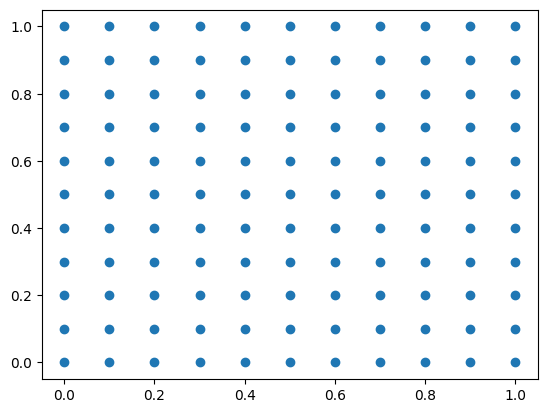

In [12]:
plt.scatter(xxx, yyy)

In [13]:
# practicing numpy functions
np.linspace(0, 1, 11)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])